# Welcome to the notebook of Nadwe Narciso Fabiao

## Table of content:
0. [Getting Started](#1.-Getting-Started)

### 0. Getting Started

This notebook contains code for the Data Mining of twitter data from the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing necessary library 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns

#import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer and Stemmer
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
!ls

'tweets dataset.csv'


## 1.1 Dataset

***$a.$*** Read the training dataset file and display the number of rows, columns and classlabel, top n records, Shape of data, Datatypes of all columns, checking for null values,number of target values.

In [5]:
print('Reading the training dataset file and displaying the top 10 records')
data= pd.read_csv("tweets dataset.csv")
data.head(10)
#Negative tweets (class label = 1) are found to be hateful and or offensive (sexist/political/racist), while positive tweets (labelled as 0) are loving, kind, neutral.

Reading the training dataset file and displaying the top 10 records


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
print('The number of rows in the dataset is:', len(data.index))
print('The number of columns in the dataset is:',len(data.columns))
print('The number of classlabel is',len(data['label']),'while the number of unique classlabel is',len(data['label'].unique()))
print('The shape of the dataset is',data.shape)
print('The columns data type is :\n',data.dtypes)
print('The number of rows with missing values is',data.isnull().values.ravel().sum())
print('The number of target values is',len(data['label']))

The number of rows in the dataset is: 31962
The number of columns in the dataset is: 3
The number of classlabel is 31962 while the number of unique classlabel is 2
The shape of the dataset is (31962, 3)
The columns data type is :
 id        int64
label     int64
tweet    object
dtype: object
The number of rows with missing values is 0
The number of target values is 31962


In [7]:
def target_distribution(y_var, data):
    #reference:https://www.kaggle.com/code/nathanlauga/ethics-and-ai-how-to-prevent-bias-on-ml/notebook
    val = data[y_var]

    plt.style.use('seaborn-dark')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values


    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of positive and negative comments')
    ax1.set_xlabel("Unique labels")
    ax1.set_ylabel("Frequency count")
    ax1.set_yticks(cnt.index.values)
    ax1.set_yticklabels(['Negative','Positive'], minor=False, rotation=45)


    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=['Negative','Positive'], colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Proportion of positive and negative comments')
    plt.show()

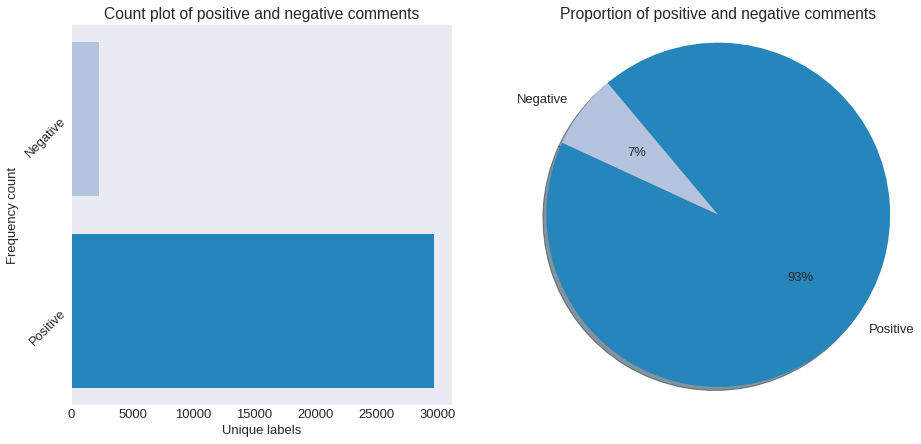

In [8]:
var = 'label'
target_distribution(y_var=var, data=data)

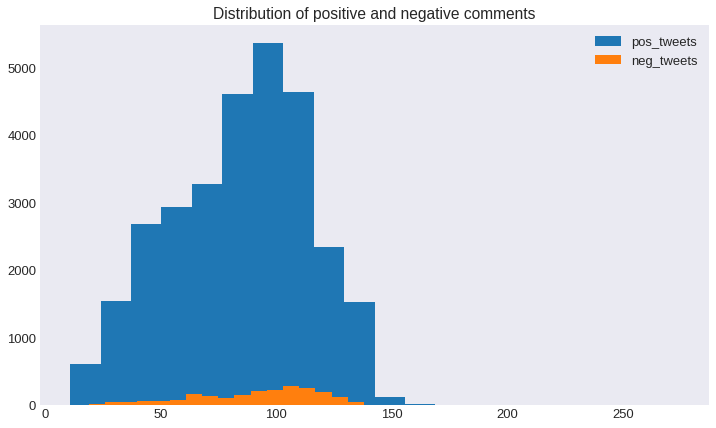

In [9]:
plt.figure(figsize=(12,7))
plt.title('Distribution of positive and negative comments')
pos = data.loc[data['label']==0]
neg = data.loc[data['label']==1]

length_pos = pos['tweet'].str.len()
length_neg = neg['tweet'].str.len()

plt.hist(length_pos, bins=20, label="pos_tweets")
plt.hist(length_neg, bins=20, label="neg_tweets")
plt.legend()
plt.show()

c.Perform the following data pre-processing tasks after partitioning your data set (on both train and test sets):

In [10]:
train_data, test_data = train_test_split(data, test_size=0.2) #partitioning the data 80 - 20 split
stop = stopwords.words('english')
train_data['tweet_tokenized'] = train_data.apply(lambda row: word_tokenize(row['tweet']), axis=1) #i.Tokenisation 
test_data['tweet_tokenized'] = test_data.apply(lambda row: word_tokenize(row['tweet']), axis=1) #i.Tokenisation 
train_data.head()

,id,label,tweet,tweet_tokenized
13175,13176,0,#cotd polar bear climb racing: angry polar b...,"[#, cotd, polar, bear, climb, racing, :, angry..."
1278,1279,0,"#goodmorning #world, we wish you a #weekend ...","[#, goodmorning, #, world, ,, we, wish, you, a..."
15008,15009,0,lights on and now lights off.. thank you @user...,"[lights, on, and, now, lights, off, .., thank,..."
12066,12067,0,@user dawn doesn't know what being a real frie...,"[@, user, dawn, does, n't, know, what, being, ..."
23289,23290,0,ð¬ð­ living the best moments ð¬ð­ #pho...,"[ð¬ð­, living, the, best, moments, ð¬ð..."


In [11]:
train_data['tweet_nopunct'] = train_data['tweet_tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()]) #ii.Punctuation removal 
test_data['tweet_nopunct'] = test_data['tweet_tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()]) 
train_data.head()

,id,label,tweet,tweet_tokenized,tweet_nopunct
13175,13176,0,#cotd polar bear climb racing: angry polar b...,"[#, cotd, polar, bear, climb, racing, :, angry...","[cotd, polar, bear, climb, racing, angry, pola..."
1278,1279,0,"#goodmorning #world, we wish you a #weekend ...","[#, goodmorning, #, world, ,, we, wish, you, a...","[goodmorning, world, we, wish, you, a, weekend..."
15008,15009,0,lights on and now lights off.. thank you @user...,"[lights, on, and, now, lights, off, .., thank,...","[lights, on, and, now, lights, off, thank, you..."
12066,12067,0,@user dawn doesn't know what being a real frie...,"[@, user, dawn, does, n't, know, what, being, ...","[user, dawn, does, know, what, being, a, real,..."
23289,23290,0,ð¬ð­ living the best moments ð¬ð­ #pho...,"[ð¬ð­, living, the, best, moments, ð¬ð...","[living, the, best, moments, phothooftheday, g..."


In [12]:
train_data['tweet_nostopword'] = train_data['tweet_nopunct'].apply(lambda x: [word for word in x if word not in (stop)]) #iii.Stopwords removal (5 Marks)
test_data['tweet_nostopword'] = test_data['tweet_nopunct'].apply(lambda x: [word for word in x if word not in (stop)]) 
train_data.head()

,id,label,tweet,tweet_tokenized,tweet_nopunct,tweet_nostopword
13175,13176,0,#cotd polar bear climb racing: angry polar b...,"[#, cotd, polar, bear, climb, racing, :, angry...","[cotd, polar, bear, climb, racing, angry, pola...","[cotd, polar, bear, climb, racing, angry, pola..."
1278,1279,0,"#goodmorning #world, we wish you a #weekend ...","[#, goodmorning, #, world, ,, we, wish, you, a...","[goodmorning, world, we, wish, you, a, weekend...","[goodmorning, world, wish, weekend, everyone, ..."
15008,15009,0,lights on and now lights off.. thank you @user...,"[lights, on, and, now, lights, off, .., thank,...","[lights, on, and, now, lights, off, thank, you...","[lights, lights, thank, user, last, weeks, viv..."
12066,12067,0,@user dawn doesn't know what being a real frie...,"[@, user, dawn, does, n't, know, what, being, ...","[user, dawn, does, know, what, being, a, real,...","[user, dawn, know, real, friend, amp, grown, a..."
23289,23290,0,ð¬ð­ living the best moments ð¬ð­ #pho...,"[ð¬ð­, living, the, best, moments, ð¬ð...","[living, the, best, moments, phothooftheday, g...","[living, best, moments, phothooftheday, greatd..."


In [13]:
train_data['tweet_lemma'] = train_data['tweet_nostopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) #iv.Lemmatisation (5 Marks)
test_data['tweet_lemma'] = test_data['tweet_nostopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) 
train_data.head()

,id,label,tweet,tweet_tokenized,tweet_nopunct,tweet_nostopword,tweet_lemma
13175,13176,0,#cotd polar bear climb racing: angry polar b...,"[#, cotd, polar, bear, climb, racing, :, angry...","[cotd, polar, bear, climb, racing, angry, pola...","[cotd, polar, bear, climb, racing, angry, pola...","[cotd, polar, bear, climb, racing, angry, pola..."
1278,1279,0,"#goodmorning #world, we wish you a #weekend ...","[#, goodmorning, #, world, ,, we, wish, you, a...","[goodmorning, world, we, wish, you, a, weekend...","[goodmorning, world, wish, weekend, everyone, ...","[goodmorning, world, wish, weekend, everyone, ..."
15008,15009,0,lights on and now lights off.. thank you @user...,"[lights, on, and, now, lights, off, .., thank,...","[lights, on, and, now, lights, off, thank, you...","[lights, lights, thank, user, last, weeks, viv...","[light, light, thank, user, last, week, vivids..."
12066,12067,0,@user dawn doesn't know what being a real frie...,"[@, user, dawn, does, n't, know, what, being, ...","[user, dawn, does, know, what, being, a, real,...","[user, dawn, know, real, friend, amp, grown, a...","[user, dawn, know, real, friend, amp, grown, a..."
23289,23290,0,ð¬ð­ living the best moments ð¬ð­ #pho...,"[ð¬ð­, living, the, best, moments, ð¬ð...","[living, the, best, moments, phothooftheday, g...","[living, best, moments, phothooftheday, greatd...","[living, best, moment, phothooftheday, greatda..."


In [14]:
train_data['tweet_steming'] = train_data['tweet_lemma'].apply(lambda x: [porter.stem(word) for word in x]) #v.Stemming (5 Marks)
test_data['tweet_steming'] = test_data['tweet_lemma'].apply(lambda x: [porter.stem(word) for word in x])
train_data.head()

,id,label,tweet,tweet_tokenized,tweet_nopunct,tweet_nostopword,tweet_lemma,tweet_steming
13175,13176,0,#cotd polar bear climb racing: angry polar b...,"[#, cotd, polar, bear, climb, racing, :, angry...","[cotd, polar, bear, climb, racing, angry, pola...","[cotd, polar, bear, climb, racing, angry, pola...","[cotd, polar, bear, climb, racing, angry, pola...","[cotd, polar, bear, climb, race, angri, polar,..."
1278,1279,0,"#goodmorning #world, we wish you a #weekend ...","[#, goodmorning, #, world, ,, we, wish, you, a...","[goodmorning, world, we, wish, you, a, weekend...","[goodmorning, world, wish, weekend, everyone, ...","[goodmorning, world, wish, weekend, everyone, ...","[goodmorn, world, wish, weekend, everyon, aeby..."
15008,15009,0,lights on and now lights off.. thank you @user...,"[lights, on, and, now, lights, off, .., thank,...","[lights, on, and, now, lights, off, thank, you...","[lights, lights, thank, user, last, weeks, viv...","[light, light, thank, user, last, week, vivids...","[light, light, thank, user, last, week, vivids..."
12066,12067,0,@user dawn doesn't know what being a real frie...,"[@, user, dawn, does, n't, know, what, being, ...","[user, dawn, does, know, what, being, a, real,...","[user, dawn, know, real, friend, amp, grown, a...","[user, dawn, know, real, friend, amp, grown, a...","[user, dawn, know, real, friend, amp, grown, a..."
23289,23290,0,ð¬ð­ living the best moments ð¬ð­ #pho...,"[ð¬ð­, living, the, best, moments, ð¬ð...","[living, the, best, moments, phothooftheday, g...","[living, best, moments, phothooftheday, greatd...","[living, best, moment, phothooftheday, greatda...","[live, best, moment, phothooftheday, greatday,..."


In [15]:
train_data['clean_tweets'] = train_data['tweet_steming'].apply(lambda x:' '.join(x))
test_data['clean_tweets'] = test_data['tweet_steming'].apply(lambda x:' '.join(x))

test_data[['label','tweet','clean_tweets']].head() 

,label,tweet,clean_tweets
14388,0,having a wonderful bihday morning so far amazi...,wonder bihday morn far amaz compani present ca...
19091,0,@user fathers day dad luv &amp; miss you al...,user father day dad luv amp miss alway
29745,0,i be making people so angry wit me &amp; ion e...,make peopl angri wit amp ion even bee none man...
20643,0,good morning to everyone celebrating #healthye...,good morn everyon celebr healthyeatingweek kee...
2568,0,always be #withboby,alway withbobi


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
import itertools

def bag_of_words_TFIDF(dataframe,option=1):
  corpus = [ dataframe.clean_tweets.iloc[i] for i in range(len(dataframe.clean_tweets))]#retrieving all the tweets and creating a main corpus to leverage bag of word representation
  tfidf_vectorizer = TfidfVectorizer()

  X = tfidf_vectorizer.fit_transform(corpus)
  # Converting above list to DataFrame
  tfidf_df = pd.DataFrame(X.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

  if option == 2:
    vectorizer            =  TfidfVectorizer()
    train_tf_idf_features =  vectorizer.fit_transform(corpus).toarray()
    # Converting above list to DataFrame
    tfidf_df          = pd.DataFrame(train_tf_idf_features)
  
  return tfidf_df

train_tfidf = bag_of_words_TFIDF(train_data) 
test_tfidf = bag_of_words_TFIDF(test_data) 

train_tfidf_extra_ = bag_of_words_TFIDF(train_data,option=2) 
test_tfidf_extra = bag_of_words_TFIDF(test_data,option=2) 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Saparating train and test labels from all features
train_Y               = train_data['label']
test_Y               = test_data['label']

#without feature enginnering 
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
train_df_pca = pca.fit_transform(train_tfidf)
test_df_pca = pca.fit_transform(test_tfidf)

In [18]:
#Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(train_df_pca, train_Y, test_size=0.3, random_state = 42)# Random Forest Classifier

_RandomForestClassifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
_RandomForestClassifier.fit(X_train, y_train)
_RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(test_df_pca)

print("Accuracy => ", round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2))
print("\nRandom Forest Classifier results: \n")
print(classification_report(y_test, _RandomForestClassifier_prediction, target_names = ['positive', 'negative']))
print("Validation Accuracy => ", round(accuracy_score(val_RandomForestClassifier_prediction, test_Y)*100, 2))
print("\nValidation Random Forest Classifier results: \n")
print(classification_report(test_Y, val_RandomForestClassifier_prediction, target_names = ['positive', 'nagative']))

Accuracy =>  93.39

Random Forest Classifier results: 

              precision    recall  f1-score   support

    positive       0.94      0.99      0.97      7138
    negative       0.61      0.14      0.23       533

    accuracy                           0.93      7671
   macro avg       0.77      0.57      0.60      7671
weighted avg       0.92      0.93      0.91      7671

Validation Accuracy =>  92.27

Validation Random Forest Classifier results: 

              precision    recall  f1-score   support

    positive       0.92      1.00      0.96      5906
    nagative       0.00      0.00      0.00       487

    accuracy                           0.92      6393
   macro avg       0.46      0.50      0.48      6393
weighted avg       0.85      0.92      0.89      6393



In [19]:
from sklearn import svm
#Create a svm Classifier
_SVMClasssifier = svm.SVC(kernel='linear') # Linear Kernel
_SVMClasssifier.fit(X_train, y_train)
_SVMClasssifier_prediction = _SVMClasssifier.predict(X_test)
val_SVMClasssifierr_prediction = _SVMClasssifier.predict(test_df_pca)

print("Accuracy => ", round(accuracy_score(_SVMClasssifier_prediction, y_test)*100, 2))
print("\nSupport Vector Machine Classifier results: \n")
print(classification_report(y_test, _SVMClasssifier_prediction, target_names = ['positive', 'negative']))
print("Validation Accuracy => ", round(accuracy_score(val_SVMClasssifierr_prediction, test_Y)*100, 2))
print("\nValidation Support Vector Machine Classifier Classifier results: \n")
print(classification_report(test_Y, val_SVMClasssifierr_prediction, target_names = ['positive', 'nagative']))

Accuracy =>  93.05

Support Vector Machine Classifier results: 

              precision    recall  f1-score   support

    positive       0.93      1.00      0.96      7138
    negative       0.00      0.00      0.00       533

    accuracy                           0.93      7671
   macro avg       0.47      0.50      0.48      7671
weighted avg       0.87      0.93      0.90      7671

Validation Accuracy =>  92.38

Validation Support Vector Machine Classifier Classifier results: 

              precision    recall  f1-score   support

    positive       0.92      1.00      0.96      5906
    nagative       0.00      0.00      0.00       487

    accuracy                           0.92      6393
   macro avg       0.46      0.50      0.48      6393
weighted avg       0.85      0.92      0.89      6393



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Section 2

In [20]:
from wordcloud import WordCloud

In [21]:
def cloud_rep(dataframe):

  combined_text = '' 
  for tweet in dataframe.clean_tweets:            #selecting each cleaned resume text
    tweet = str(tweet)                    #converting to string
    tokens = tweet.split()                #splitting into tokens
    for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower()  
          if tokens[i] == 'user':#remove the word user from the dataset
            tokens[i] = ''
    combined_text += " ".join(tokens)+" " #combining all the text into one string for purpose for creating wordcloud

  # Creating word_cloud with text as argument in .generate() method
  word_cloud = WordCloud(width = 1800, height = 1800, background_color ='white',collocations = False).generate(combined_text)
  # Display the generated Word Cloud
  # plot the WordCloud image                        
  plt.figure(figsize = (15, 15), facecolor = None) 
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

def clean_text(dataframe):
  stop = stopwords.words('english')
  dataframe['tweet_tokenized'] = dataframe.apply(lambda row: word_tokenize(row['tweet']), axis=1)
  dataframe['tweet_nopunct'] = dataframe['tweet_tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()]) 
  dataframe['tweet_nostopword'] = dataframe['tweet_nopunct'].apply(lambda x: [word for word in x if word not in (stop)]) 
  dataframe['tweet_lemma'] = dataframe['tweet_nostopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) 
  dataframe['tweet_steming'] = dataframe['tweet_lemma'].apply(lambda x: [porter.stem(word) for word in x]) #v.Stemming (5 Marks)
  dataframe['clean_tweets'] = dataframe['tweet_steming'].apply(lambda x:' '.join(x))

  return dataframe

In [22]:
raw_Data = clean_text(data)

In [23]:
positive = raw_Data.loc[raw_Data['label'] == 0]
negative = raw_Data.loc[raw_Data['label'] == 1]

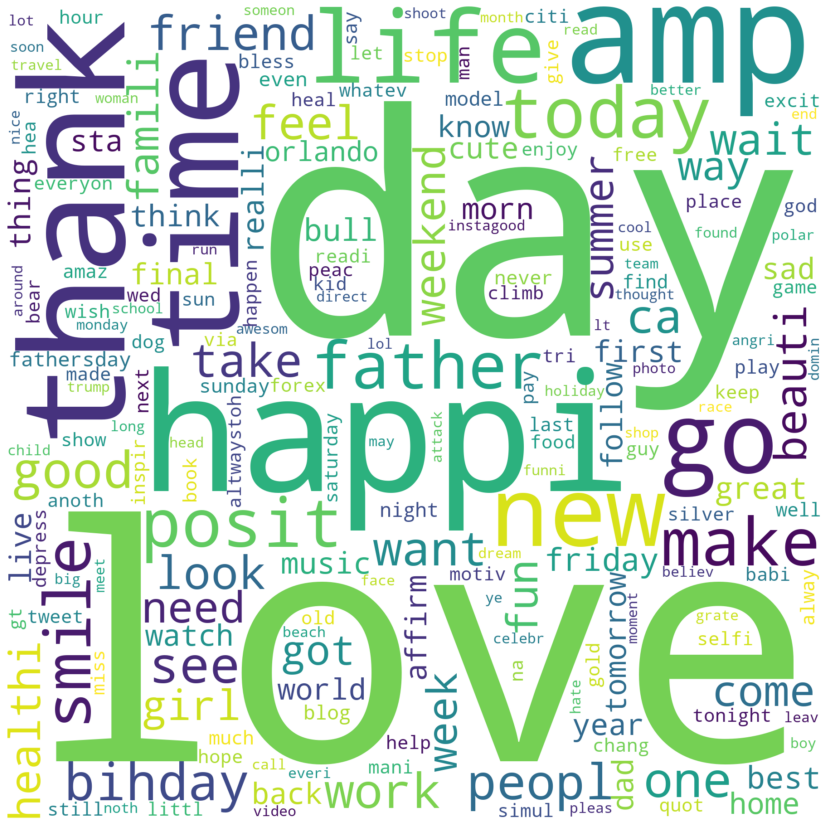

In [24]:
cloud_rep(positive)

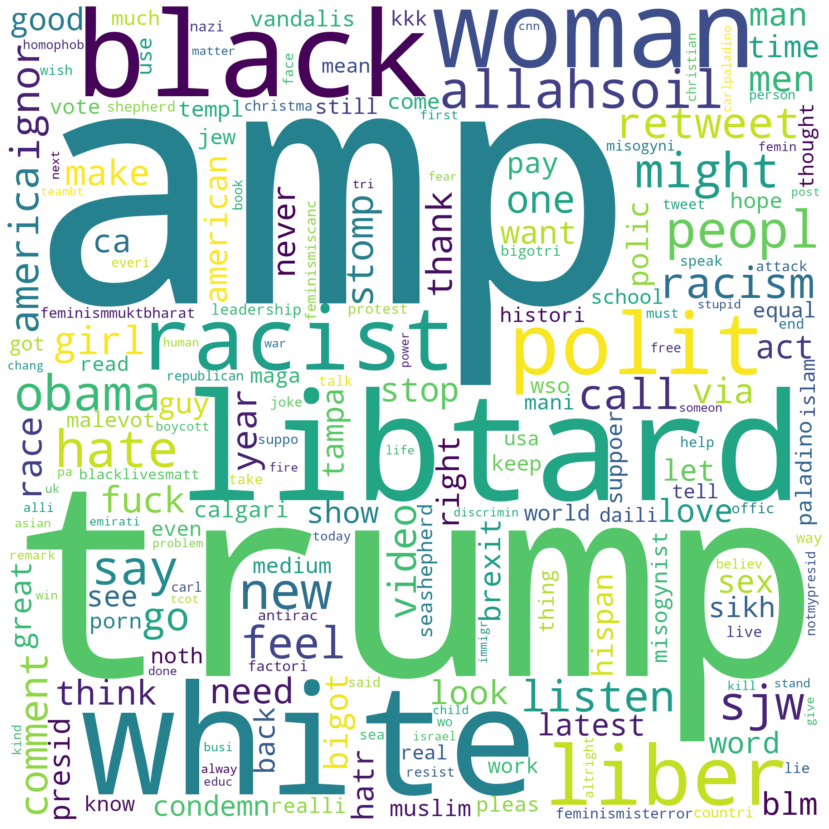

In [25]:
cloud_rep(negative)

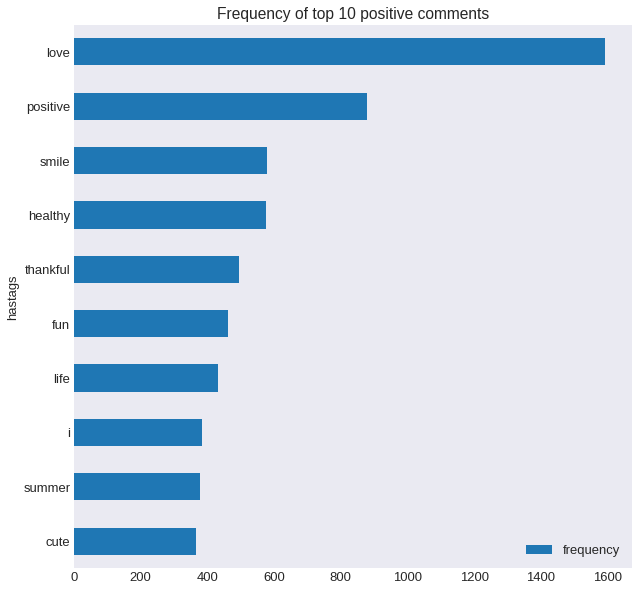

In [65]:
from collections import Counter
import re

corpus = [ positive.tweet.iloc[i].replace('user', '') for i in range(len(positive.tweet))]#retrieving all the tweets and creating a main corpus to leverage bag of word representation

hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(corpus), re.I))
tweets_dict = dict(hash_counts)
names = list(tweets_dict.keys())
values = list(tweets_dict.values())

indexs = sorted(range(len(values)), key=lambda i: values[i])[-10:]
values_ = [values[i] for i in indexs]
names_ = [names[i] for i in indexs]

df = pd.DataFrame({'hastags':names_, 'frequency':values_})
df.plot.barh(x='hastags', y='frequency', rot=0,figsize=(10,10))
plt.title('Frequency of top 10 positive comments')
plt.show()

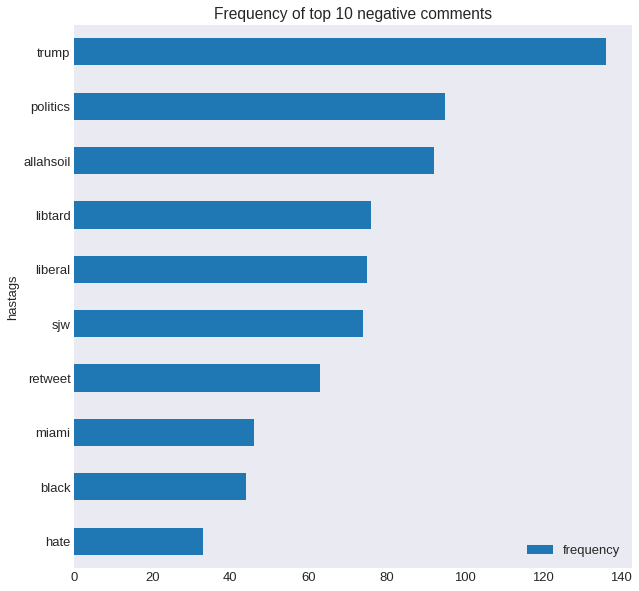

In [64]:
corpus = [ negative.tweet.iloc[i].replace('user', '') for i in range(len(negative.tweet))]#retrieving all the tweets and creating a main corpus to leverage bag of word representation

hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(corpus), re.I))
tweets_dict = dict(hash_counts)
names = list(tweets_dict.keys())
values = list(tweets_dict.values())

indexs = sorted(range(len(values)), key=lambda i: values[i])[-10:]
values_ = [values[i] for i in indexs]
names_ = [names[i] for i in indexs]

df = pd.DataFrame({'hastags':names_, 'frequency':values_})
df.plot.barh(x='hastags', y='frequency', rot=0,figsize=(10,10))
plt.title('Frequency of top 10 negative comments')
plt.show()